# This is my sample .ipynb file!
This could be your analyses files, your visualization files, etc.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns
from tqdm import tqdm
import re
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols as sm_ols

# Importing the Datasets


- WFH - % with access to a "flexible workplace"
- turnover - quit_rate
- productivity - % change in output per hour
- compensation - 12 months % change in wage

In [2]:
WFH = pd.read_csv('../stash-ka/inputs/employee_benefits.csv')
WFH.rename(columns = {'Series title ':'Industry'}, inplace = True)
WFH.rename(columns = {'Estimate':'WFH%'}, inplace = True)
WFH['WFH%'] = pd.to_numeric(WFH['WFH%'],errors='coerce')
WFH.info()
WFH.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Series ID                    479 non-null    object 
 1   Industry                     479 non-null    object 
 2   Year                         479 non-null    int64  
 3   WFH%                         475 non-null    float64
 4   Estimate footnote            4 non-null      float64
 5   Standard error               479 non-null    float64
 6   Standard error footnote      0 non-null      float64
 7   Survey code                  479 non-null    object 
 8   Survey text                  479 non-null    object 
 9   Ownership code               479 non-null    int64  
 10  Ownership text               479 non-null    object 
 11  Industry code                479 non-null    object 
 12  Industry text                479 non-null    object 
 13  Occupation code     

,Year,WFH%,Estimate footnote,Standard error,Standard error footnote,Ownership code,Occupation code,Subcell code,Estimate code,Datatype code,Provision code
count,479.000000,475.000000,4.0,479.000000,0.0,479.000000,479.0,479.0,479.0,479.0,479.0
mean,2016.175365,7.551579,1.0,1.136326,NaN,1.943633,0.0,0.0,73.0,33.0,357.0
std,3.749273,6.827514,0.0,0.657954,NaN,0.632915,0.0,0.0,0.0,0.0,0.0
min,2010.000000,1.000000,1.0,0.100000,NaN,1.000000,0.0,0.0,73.0,33.0,357.0
25%,2013.000000,3.000000,1.0,0.650000,NaN,2.000000,0.0,0.0,73.0,33.0,357.0
50%,2016.000000,5.000000,1.0,1.000000,NaN,2.000000,0.0,0.0,73.0,33.0,357.0
75%,2019.000000,9.000000,1.0,1.400000,NaN,2.000000,0.0,0.0,73.0,33.0,357.0
max,2022.000000,39.000000,1.0,3.800000,NaN,3.000000,0.0,0.0,73.0,33.0,357.0


In [3]:
industry_name_list=[]

for industry in WFH['Industry']:
    industry_name = industry.split('in ')[1].capitalize()
    industry_name_list.append(industry_name)
    
WFH['Industry'] = industry_name_list

In [4]:
turnover = pd.read_csv('../stash-ka/inputs/turnover.csv')

In [5]:
turnover.rename(columns = {'Series Id':'Industry'}, inplace = True)
turnover.rename(columns = {'Value':'quit_rate'}, inplace = True)
turnover.info()
turnover.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       351 non-null    int64  
 1   Industry   351 non-null    object 
 2   quit_rate  351 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.4+ KB


,Year,quit_rate
count,351.000000,351.000000
mean,2016.000000,1.786895
std,3.746999,0.997711
min,2010.000000,0.300000
25%,2013.000000,1.100000
50%,2016.000000,1.600000
75%,2019.000000,2.300000
max,2022.000000,5.800000


In [6]:
productivity = pd.read_csv('../stash-ka/inputs/output_per_hour_pct.csv')
productivity.info()
productivity.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         209 non-null    int64  
 1   % change in output per hour  209 non-null    float64
 2   Industry                     209 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB


,Year,% change in output per hour
count,209.00000,209.000000
mean,2016.00000,1.189952
std,3.16987,2.891972
min,2011.00000,-10.900000
25%,2013.00000,-0.600000
50%,2016.00000,1.100000
75%,2019.00000,2.800000
max,2021.00000,11.300000


In [7]:
compensation = pd.read_csv('../stash-ka/inputs/pct_change_compensation.csv')
compensation.rename(columns = {'12 months pct change in wage':'Industry'}, inplace = True)
compensation.rename(columns = {'Estimate Value':'% change in average wage'}, inplace = True)
compensation.info()
compensation.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      260 non-null    int64  
 1   Industry                  260 non-null    object 
 2   % change in average wage  260 non-null    float64
 3   Standard Error            260 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.2+ KB


,Year,% change in average wage,Standard Error
count,260.000000,260.000000,260.000000
mean,2016.000000,2.711154,0.442308
std,3.748874,1.194966,0.386723
min,2010.000000,0.000000,0.100000
25%,2013.000000,1.900000,0.200000
50%,2016.000000,2.400000,0.400000
75%,2019.000000,3.200000,0.500000
max,2022.000000,8.100000,4.400000


# EDA
We envision a singular WFH dataset that encompasses the main variables from all of the imported datasets. More specifically, it would contain the following variables: 
 - `Year` (across all datasets)
 - `Industry` (across all datasets)
 - `WFH%` (WFH dataset)
 - `quit_rate` (Turnover dataset)
 - `% change in output per hour` (Productivity dataset)
 - `% change in average wage` (Compensation dataset)
 
Our final dataset will be in panel format, by industry and year (2010-2022). 

### WFH
This dataset, obtained from the BLS Employee Benefit Survey, contains the main WFH % variable for our analysis, it sets the stage for categorizing each industry. An initial problem that immediately pops out is the data type of the WFH variable, it must be changed to a numeric type to behave correctly in our analysis. Additionally, the excess columns must be dropped in order to simplify the merge. The highest WFH rate is 39% and the lowest is 1%, numbers we believe are quite feasible.

### Turnover 
This dataset, obtained form the BLS JOLTS database, is very straightforward. It contains solely the industry, year, and quit_rate. After describing the variables, the minimum is 0.3% and the maximum is 5.8%. We did not encounter many difficulties when utilizing this dataset. 

### Productivity
This dataset, obtained from the BLS Office of Productivity and Technology, specifically references the `output per hour` variable that they track in their labor productivity/Total Factor Productivity databases. This variable is further broken down into industry and year, like the others. There was one issue that we found which may bring up problems; this dataset only spans into 2021, not 2022. This may influence our creation of visualizations in the future. All other variables seem sufficient. % change in output per hour max is 11.3 and the min is -10.9.

### Compensation
This dataset, obtained from the BLS Current Population Survey, provides the compensation variable for our study, `% change in average wage`. When importing the dataset initially, the coumns names are also labeled incorrectly so this needed to be fixed. The % change variable is of sufficient type and its maximum is 8.1% and the minimum is 0%. The standard error column will also need to be deleted.

# Merge

In [8]:
# first dropping unecessary WFH and compensation dataframe columns

WFH = WFH[['Year','Industry', 'WFH%']]
WFH
compensation = compensation.drop('Standard Error', axis=1)
compensation

,Year,Industry,% change in average wage
0,2010,Utilities,2.0
1,2011,Utilities,2.8
2,2012,Utilities,2.4
3,2013,Utilities,2.9
4,2014,Utilities,2.5
...,...,...,...
255,2018,Service-providing,3.2
256,2019,Service-providing,2.9
257,2020,Service-providing,2.9
258,2021,Service-providing,5.2


In [9]:
WFH

,Year,Industry,WFH%
0,2010,Education and health services,3.0
1,2011,Education and health services,3.0
2,2012,Education and health services,3.0
3,2013,Education and health services,3.0
4,2014,Education and health services,3.0
...,...,...,...
474,2018,Service providing,4.0
475,2019,Service providing,4.0
476,2020,Service providing,4.0
477,2021,Service providing,5.0


In [10]:
#right_merge = WFH.merge(compensation, how = 'left', on= 'Industry','Year', indicator=True, validate='m:m')
intermediate = pd.merge(WFH, compensation, how='left', on=['Industry','Year'], indicator=True, validate='m:m')
intermediate = intermediate.drop('_merge', axis=1)

intermediate2 = pd.merge(intermediate, turnover, how='left', on=['Industry','Year'], indicator=True, validate='m:m')
intermediate2 = intermediate2.drop('_merge', axis=1)

complete_dataset = pd.merge(intermediate2, productivity, how='left', on=['Industry','Year'], indicator=True, validate='m:m')

In [11]:
complete_dataset = complete_dataset.drop('_merge', axis=1)

In [12]:
complete_dataset

,Year,Industry,WFH%,% change in average wage,quit_rate,% change in output per hour
0,2010,Education and health services,3.0,1.5,NaN,NaN
1,2011,Education and health services,3.0,1.4,NaN,-0.5
2,2012,Education and health services,3.0,1.8,NaN,-0.5
3,2013,Education and health services,3.0,1.9,NaN,-1.0
4,2014,Education and health services,3.0,1.8,NaN,0.6
...,...,...,...,...,...,...
474,2018,Service providing,4.0,NaN,NaN,NaN
475,2019,Service providing,4.0,NaN,NaN,NaN
476,2020,Service providing,4.0,NaN,NaN,NaN
477,2021,Service providing,5.0,NaN,NaN,NaN


# Visualizaitons

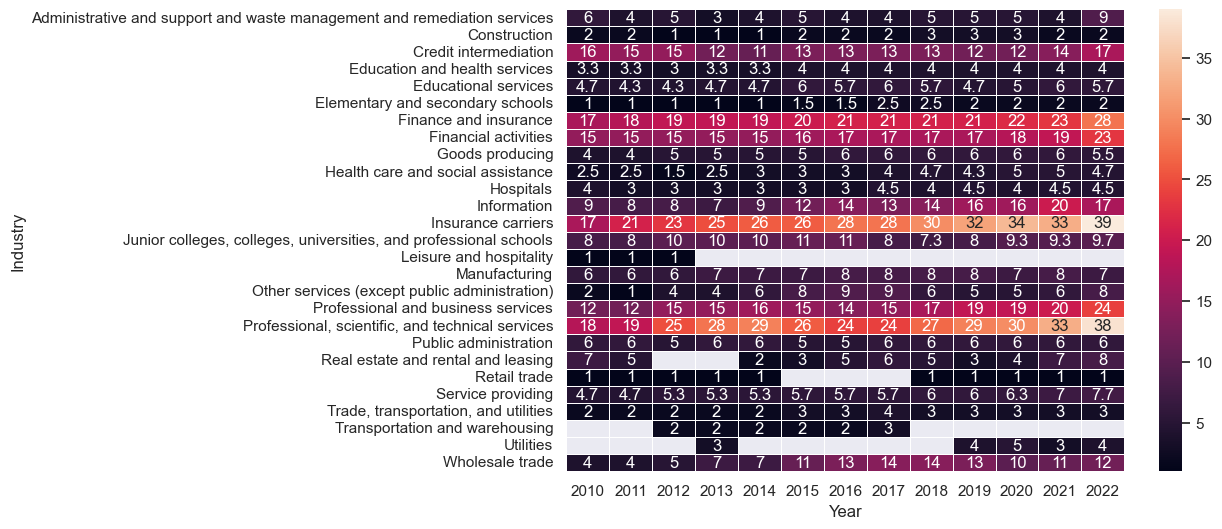

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# create pivot table
complete_subset = complete_dataset[['Year', 'Industry','WFH%']]
complete_subset_pivot = complete_subset.pivot_table("WFH%", "Industry", "Year")

# Draw a heatmap with the numeric values of WFH% in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(complete_subset_pivot, annot=True, linewidths=.5, ax=ax)
f.savefig('../stash-ka/pics/heatmap.jpg', bbox_inches='tight', dpi=150)

C:\Users\Jontr\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


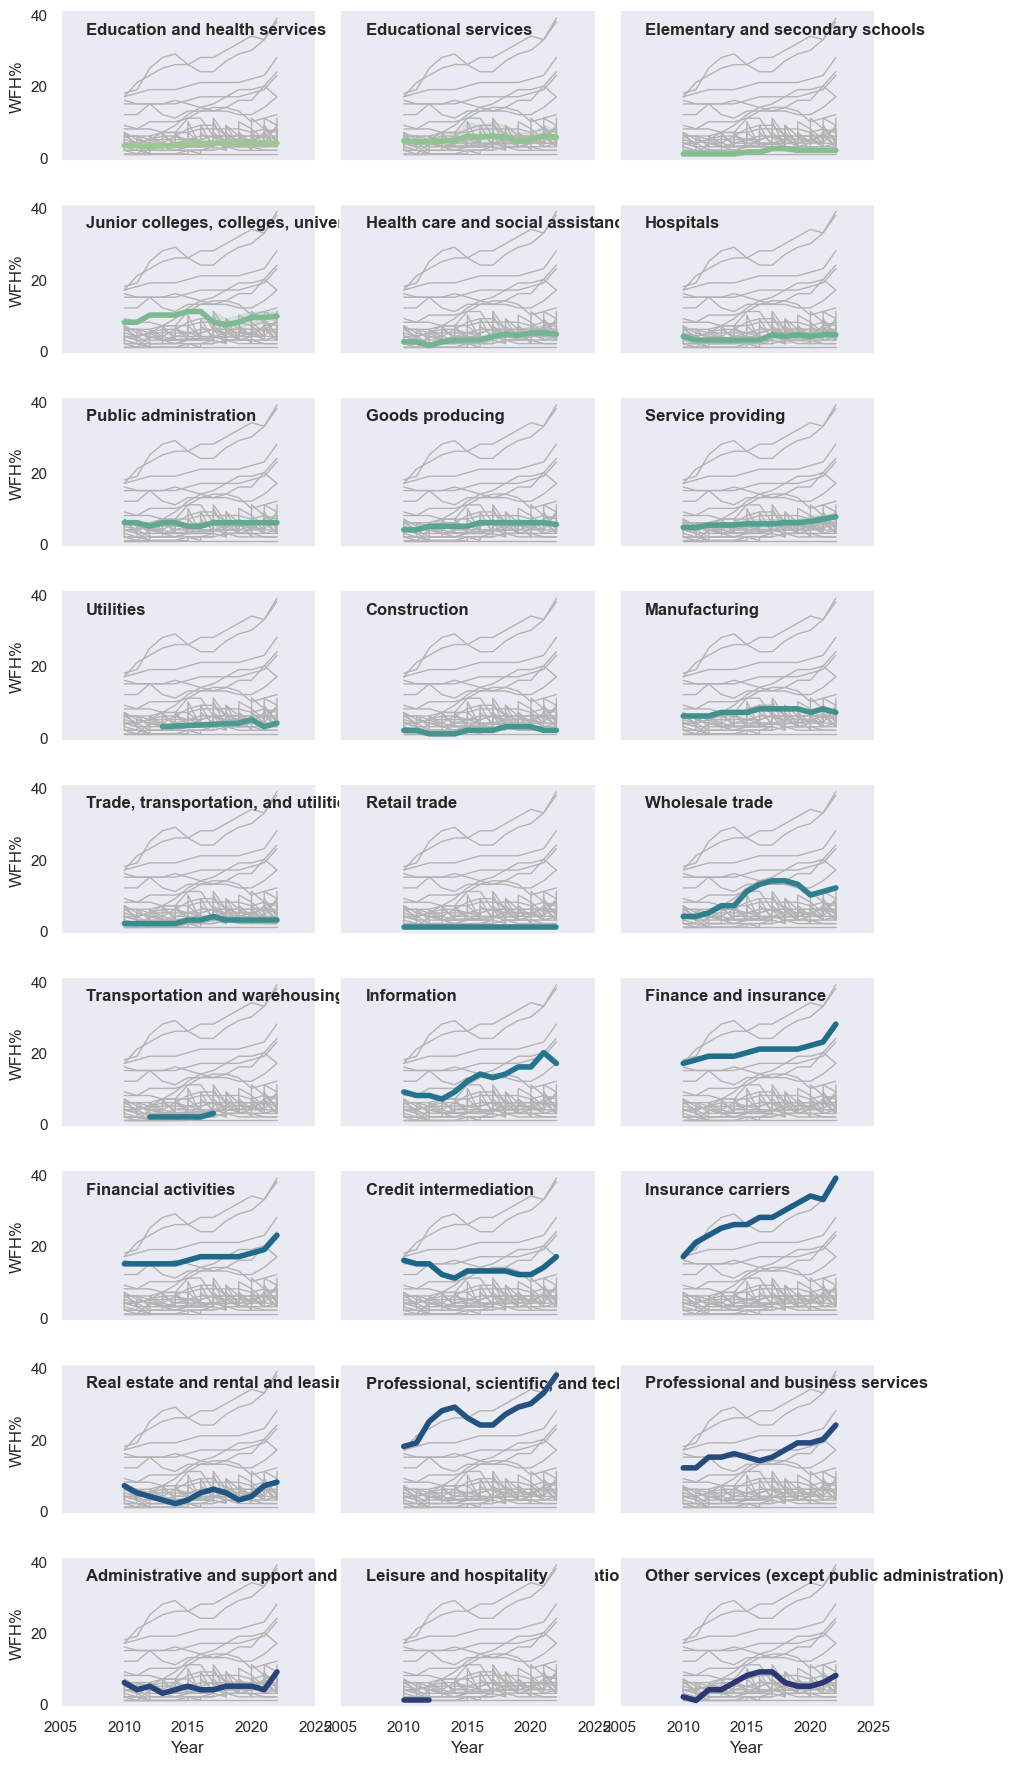

In [14]:
import seaborn as sns

sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=complete_dataset,
    x="Year", y="WFH%", col="Industry", hue="Industry",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for Industry, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(0.1, .85, Industry, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=complete_dataset, x="Year", y="WFH%", units="Industry",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[:5])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Year", "WFH%")
g.tight_layout()
g.savefig('../stash-ka/pics/multiple_time_series.jpg', bbox_inches='tight', dpi=150)

In [15]:
complete_dataset_subset2 =  complete_dataset.drop('Year', axis=1)

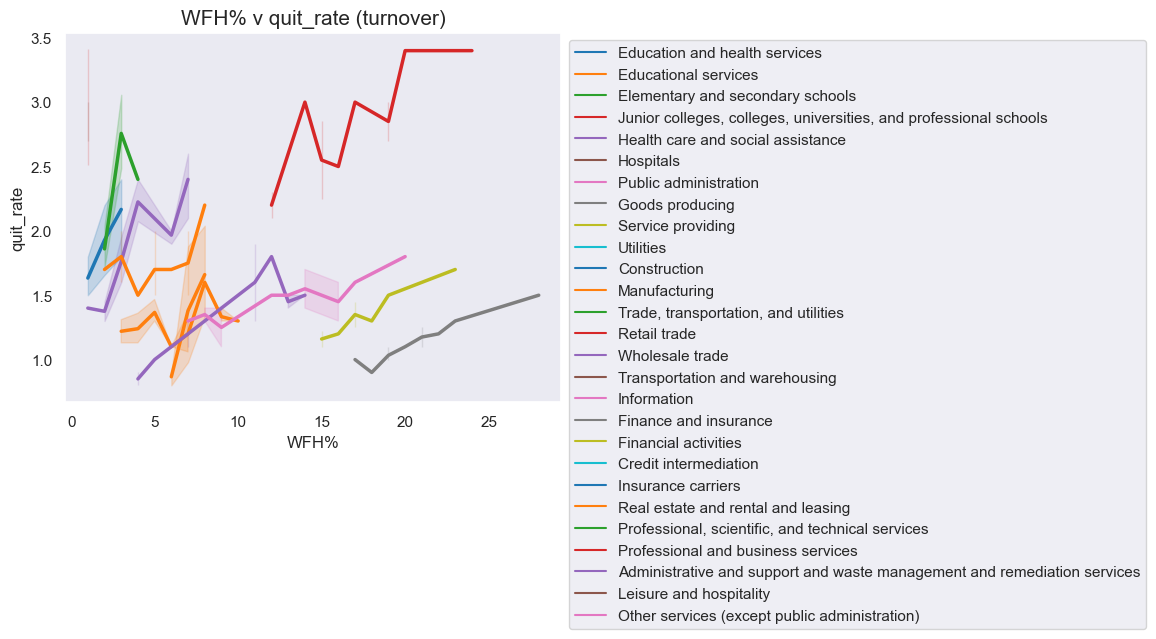

<Figure size 640x480 with 0 Axes>

In [16]:
sns.lineplot(data=complete_dataset_subset2,x = "WFH%", y="quit_rate", hue = "Industry", palette="tab10", linewidth=2.5)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('WFH% v quit_rate (turnover)', fontsize=15)
plt.show()
plt.savefig('../stash-ka/pics/WFH_v_turnover.jpg', bbox_inches='tight', dpi=150)

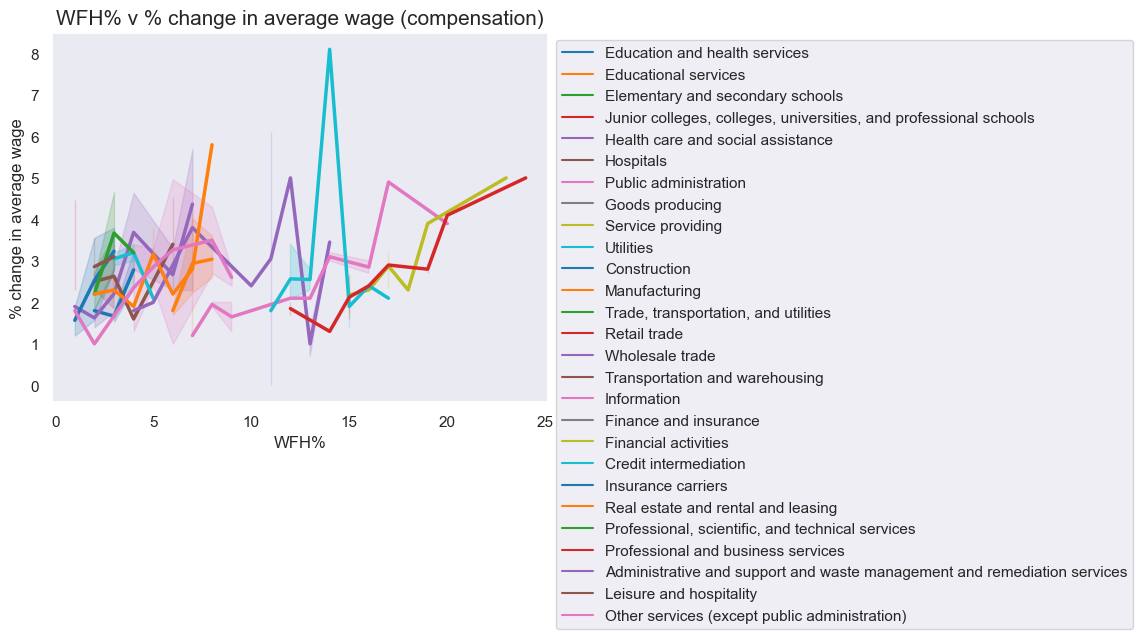

<Figure size 640x480 with 0 Axes>

In [17]:
sns.lineplot(data=complete_dataset_subset2,x = "WFH%", y="% change in average wage", hue = "Industry", palette="tab10", linewidth=2.5)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('WFH% v % change in average wage (compensation)', fontsize=15)
plt.show()
plt.savefig('../stash-ka/pics/WFH_v_compensation.jpg', bbox_inches='tight', dpi=150)

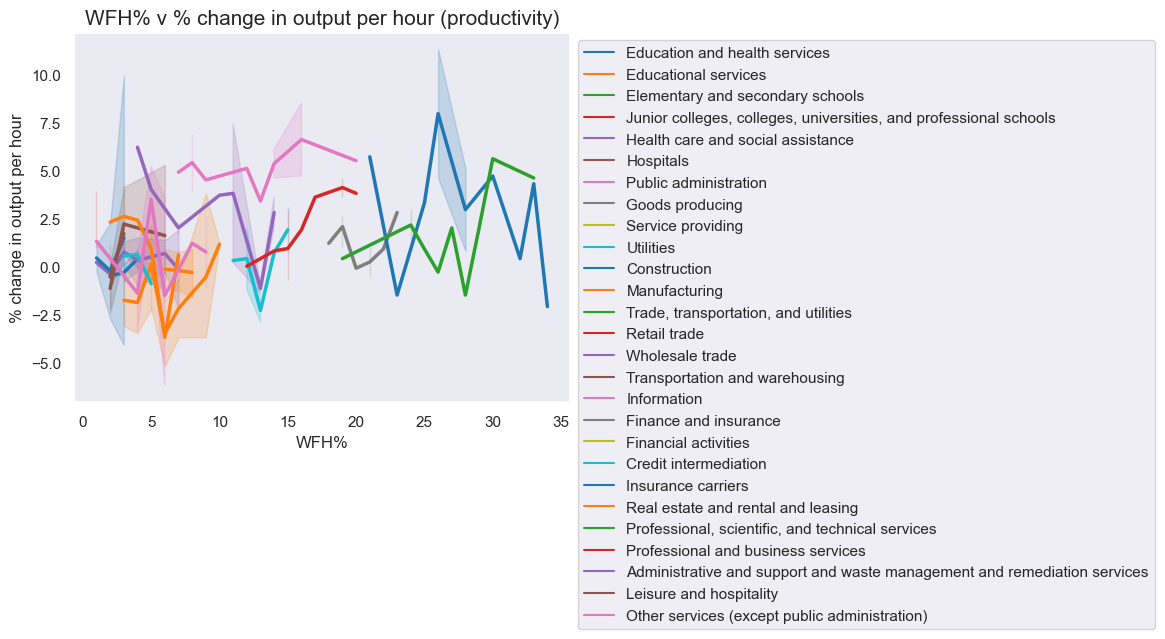

<Figure size 640x480 with 0 Axes>

In [18]:
sns.lineplot(data=complete_dataset_subset2,x = "WFH%", y="% change in output per hour", hue = "Industry", palette="tab10", linewidth=2.5)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('WFH% v % change in output per hour (productivity)', fontsize=15)
plt.show()
plt.savefig('../stash-ka/pics/WFH_v_productivity.jpg', bbox_inches='tight', dpi=150)